# Assignment 3
### Ameena Khan
### CS595 : Transparent and Interactive ML

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from graphviz import Source

## The Data
This dataset is from [Kaggle: Diagnose Specific Language Impairment in Children](https://www.kaggle.com/dgokeeffe/specific-language-impairment/data). It is a collection of three separate datasets which all consist of narratives from a child (adolescent and younger) attempting to complete a wordless picture task. Based on the narratives, features have been given to describe the fluency of their response. The goal is to be able to automate the diagnosis of "Specific Language Impairment" given these features. Specific Language Impairment (SLI) is a condition that effects 7% of 5-year-old children and is characterized by a lack of language ability in comparison to peers but with no obvious mental or physical disability

The dataset contains 1163 instances and 64 features (60 numerical, 4 categorical). A decription of these features can be found [here](https://www.kaggle.com/dgokeeffe/specific-language-impairment).

In [2]:
df = pd.read_csv("~/Downloads/all_data_R.csv")

## Preprocessing 
The *group* is perfectly matched to the *Y* feature. The only difference if that *group* contains the categorical label for classification (i.e. whether or not the child has SLI) which *Y* uses a numerical representation. As the decision tree classifier works primarily on float-typed data, the feature *group* was removed without the loss of information. 

The *corpus* feature was also removed as it indicated which of the three sub-datasets the instance belonged to. As the following experiment considers the dataset as a whole, these feature is also unnecessary. 

The *filename* feature is also irrelavent to the diagnosis of SLI in clidren and simply states where the child's narative is stored. Thus, it was also removed. 

The *sex* feature, not obviously insignificant or redundant, was kept in the data set but changed from a string-type value to a numerical representation to be used by the decision tree classifier. 

In [3]:
print(df.info(verbose=False))

df = df.drop('group', axis=1)
df = df.drop('corpus', axis=1)
df = df.drop('filename', axis=1)
gender = df["sex"].unique()
gender_to_int = {"male":1, "female":2}
df["sex"] =df["sex"].replace(gender_to_int)
df["sex"].fillna(0,inplace=True)
                 
df.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Columns: 64 entries, Y to total_error
dtypes: float64(23), int64(37), object(4)
memory usage: 581.6+ KB
None


,Y,sex,age,age(years),child_TNW,child_TNS,examiner_TNW,freq_ttr,r_2_i_verbs,mor_words,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
0,1,0.0,165,13.750000,287,36,4,0.333,0.108108,252,...,8,1.210456,0,2,2,7,0,0,1,12
1,1,0.0,172,14.333333,368,42,27,0.274,0.050000,361,...,16,1.871708,0,4,0,5,0,0,0,9
2,1,0.0,160,13.333333,266,26,2,0.411,0.105263,246,...,0,2.240602,0,1,0,5,0,0,0,6
3,1,0.0,184,15.333333,405,40,21,0.359,0.148936,348,...,4,1.877762,1,0,0,11,0,0,0,12
4,1,0.0,176,14.666667,300,35,20,0.279,0.150000,294,...,8,0.339524,0,1,1,5,0,0,0,7


## Test-Train Split 

In [4]:
train, test = train_test_split(df, test_size = 0.33)
print("TRAINING SET\n")
print(train.info(verbose=False), "\n\n")
print("TESTING SET\n")
print(test.info(verbose=False))

TRAINING SET

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 53 to 669
Columns: 61 entries, Y to total_error
dtypes: float64(24), int64(37)
memory usage: 377.3 KB
None 


TESTING SET

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 429 to 49
Columns: 61 entries, Y to total_error
dtypes: float64(24), int64(37)
memory usage: 186.0 KB
None


## DT Depth = 1

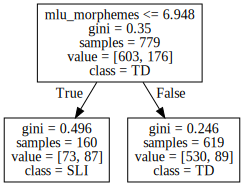

In [5]:
features = list(train)
features = features[1:]
targets = train["Y"]

train_with_label = train
train = train.drop('Y', axis=1)
test_with_label = test
test = test.drop('Y', axis=1)

clf1 = tree.DecisionTreeClassifier(max_depth=1, random_state = 0)
clf1 = clf1.fit(train[features],targets)
Source(tree.export_graphviz(clf1, out_file=None,feature_names =features, class_names=["TD","SLI"]))

In [6]:
trainer = clf1.predict(train)
print("Depth = 1, Accuracy on training set:", accuracy_score(train_with_label['Y'],trainer)*100)
tester = clf1.predict(test)
print("Depth = 1, Accuracy on training set:", accuracy_score(test_with_label["Y"],tester)*100)

Depth = 1, Accuracy on training set: 79.2041078306
Depth = 1, Accuracy on training set: 78.6458333333


**mlu_morphemes** is the mean length of utterance of morphemes. It shows how many morphemes the child used in his/her average utterance (speaking without break) length. Morphemes are defined as "smallest meaningful unit in the grammar of a language."[Reference](http://www.glossary.sil.org/term/morpheme) Thus, it is logical that a child with fewing meaningful units in an utterance is more likely to have SLI. 

## DT Depth = 2

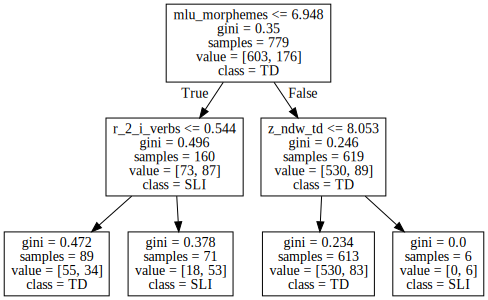

In [7]:
clf2 = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf2 = clf2.fit(train[features],targets)
Source(tree.export_graphviz(clf2, out_file=None,feature_names =features, class_names=["TD","SLI"]))

In [8]:
trainer = clf2.predict(train)
tester = clf2.predict(test)
print("Depth = 2, Accuracy on training set:", accuracy_score(train_with_label['Y'],trainer)*100)
print("Depth = 2, Accuracy on training set:", accuracy_score(test_with_label["Y"],tester)*100)

Depth = 2, Accuracy on training set: 82.6700898588
Depth = 2, Accuracy on training set: 81.5104166667


**r_2_i_verbs** is the ratio of raw to inflected verbs (i.e. non-conjugated to conjugated). Thus, it is logical that if a child uses fewer "raw" verbs, he is less likely to have SLI. 
**z_ndw_td** is the Sample-Z-score of the TD group's raw:inflected verb ratio. Again, if the sample is many standard deviations away from the average r_2_i_verbs score for children without SDL, it is more likely that that instance describes a child with SDL.


## DT Depth = 3

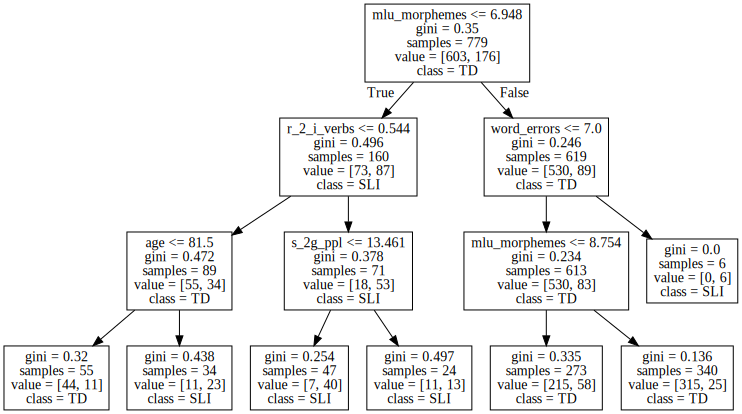

In [9]:
clf3 = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
clf3 = clf3.fit(train[features],targets)
Source(tree.export_graphviz(clf3, out_file=None,feature_names =features, class_names=["TD","SLI"]))

In [10]:
trainer = clf3.predict(train)
tester = clf3.predict(test)

print("Depth = 3, Accuracy on training set:", accuracy_score(train_with_label['Y'],trainer)*100)
print("Depth = 3, Accuracy on training set:", accuracy_score(test_with_label["Y"],tester)*100)

Depth = 3, Accuracy on training set: 84.2105263158
Depth = 3, Accuracy on training set: 82.5520833333


**word_errors** are considered as defined in the Child Language Data Exchange System (CHILDES). As expected, fewer word errors are more liekly indicative of a child without SLI.
**s_2g_ppl** captures the perplexity of the instance when compared to a language model all SLI instances (not including the current instance if applicable). Perplexity is a way of evaluating language models by bits per word. The result of this selection is unexpected as both of its resulting leaves are classified as SLI, implying that it does not effect the classification.  
It is important to the note that **age** is given in number of months in the dataset. Thus, this result is expected as a child less that 81 months(6years) is less likely to have SLI as it is usually begins to effect children at 5 years of age. Thus, it is possible that its effects are more clearly seen in children 6+ years of age.


## DT Depth = 4

In [11]:
clf4 = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf4 = clf4.fit(train[features],targets)

trainer = clf4.predict(train)
tester = clf4.predict(test)

print("Depth = 4, Accuracy on training set:", accuracy_score(train_with_label['Y'],trainer)*100)
print("Depth = 4, Accuracy on training set:", accuracy_score(test_with_label["Y"],tester)*100)

Depth = 4, Accuracy on training set: 85.8793324775
Depth = 4, Accuracy on training set: 82.03125


## DT Depth = 5

In [12]:
clf5 = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf5 = clf5.fit(train[features],targets)

trainer = clf5.predict(train)
tester = clf5.predict(test)

print("Depth = 5, Accuracy on training set:", accuracy_score(train_with_label['Y'],trainer)*100)
print("Depth = 5, Accuracy on training set:", accuracy_score(test_with_label["Y"],tester)*100)

Depth = 5, Accuracy on training set: 89.4736842105
Depth = 5, Accuracy on training set: 80.46875


## DT Depth = 6

In [13]:
clf6 = tree.DecisionTreeClassifier(max_depth=6, random_state=0)
clf6 = clf6.fit(train[features],targets)

trainer = clf6.predict(train)
tester = clf6.predict(test)

print("Depth = 6, Accuracy on training set:", accuracy_score(train_with_label['Y'],trainer)*100)
print("Depth = 6, Accuracy on training set:", accuracy_score(test_with_label["Y"],tester)*100)

Depth = 6, Accuracy on training set: 91.3992297818
Depth = 6, Accuracy on training set: 82.03125


## Results and Analysis

The accuracies of the training data were as follows: 
[79.20, 82.67, 84.21, 85.88, 89.47, 91.40].
Tha accuracies of the testing data were as follows: 
[78.64, 81,51, 82.55, 82.03, 80.47, 80.08].

As expected, the performance of the decision tree improved for the training set in each round where as it generally peaked and then began to fall for the testing sets. As the depth of the decision tree increases, it becomes more fitted to the training set as seen with the increase in accuracy. But this overfitting does not result in a better classifier as can be seen by the fall in accuracy for the training sets. The accuracies in the training set show that the ideal depth of the decision tree when may be 3 levels as this is where the first peak occurs. The second peak in the test sets, occuring the the 6-level depth, is likely due to noise in weak features that are being forced into the classifier and are skewing the results as, at this level, all features are included,  

The graphs also helped to highlight the most important features:
**mlu_morphemes** consistenly appeared as the first node in all three decision tree graphs and its partition value of 6.948 was also consistent. This provides the researcher insight that this is a significant feature and value to consider in the diagnosis of the children. Similarly, **r_2_i_verbs** also appeared in the the second level on all three graphs unlike **z_nwd_td** and **word_errors** which shows that it is likely a stronger feature that those two.